<a href="https://colab.research.google.com/github/zahraDehghanian97/SCINet/blob/master/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocess**

In [1]:
import pandas as pd
df = pd.read_csv('/content/MCIRD_aaic2021_train.csv', header=0)
df.head()


,day,subscriber_ecid,subscriber_gender,subscriber_age,registration_province,months_of_subscription,most_used_province,is_usage_nonzero,subscriber_total_expenses,nonpackage_voice_expenses,package_voice_noncash_expenses,is_voice_expenses_nonzero,is_voice_usage_nonzero,call_in_network_duration,call_off_netwrok_duration,nonpackage_call_in_network_expenses,nonpackage_call_off_network_expenses,total_call_duration,#inter_operator_calls,xyz_score,hxr_score,data_cash_expenses,nonpackage_data_expenses,package_data_noncash_expenses,subscriber_data_expenses,subscriber_nondata_expenses,data_usage_volume,is_data_expenses_nonzero,is_data_usage_nonzero,#activated_monthly_data_packages,#activated_short_term_data_packages,#activated_type_one_data_packages,#activated_type_two_data_packages,#activated_type_three_data_packages
0,(n)01,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.132373,-0.072802,0.0,1,1,-0.155626,0.0,-0.256454,0.0,-0.220797,0.0,0.031219,38.192862,0.0,0.0,0.0,0.0,-0.104687,0.072258,0,1,0,0,0,0,0
1,(n)02,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.122445,-0.060440,0.0,1,1,-0.142857,0.0,0.036145,0.0,-0.210668,0.0,0.033491,38.144232,0.0,0.0,0.0,0.0,-0.092861,0.049563,0,1,0,0,0,0,0
2,(n)03,-06FoayTOXJ8-,1,36.0,8,188,8,1,0.343066,0.519231,0.0,1,1,0.418196,0.0,0.762478,0.0,0.264686,0.0,0.036831,37.990377,0.0,0.0,0.0,0.0,0.461665,-0.013977,0,0,0,0,0,0,0
3,(n)04,-06FoayTOXJ8-,1,36.0,8,188,8,1,1.869763,2.420329,0.0,1,1,2.259377,0.0,3.144579,0.0,1.821742,0.0,0.039942,37.777398,0.0,0.0,0.0,0.0,2.280301,0.000403,0,1,0,0,0,0,0
4,(n)05,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.233858,-0.199176,0.0,1,1,-0.277733,0.0,-0.137693,0.0,-0.324105,0.0,0.042694,37.545275,0.0,0.0,0.0,0.0,-0.225579,0.016209,0,1,0,0,0,0,0


In [2]:
df1 = df[['subscriber_ecid', 'data_usage_volume']]
df1.head()

,subscriber_ecid,data_usage_volume
0,-06FoayTOXJ8-,0.072258
1,-06FoayTOXJ8-,0.049563
2,-06FoayTOXJ8-,-0.013977
3,-06FoayTOXJ8-,0.000403
4,-06FoayTOXJ8-,0.016209


خیلی از مقادیر دیتاست -0.0139766307813943 این هستن و میشه به راحتی اینارو جایگزین کرد

In [3]:
unique_sub_id = set(df1['subscriber_ecid'].values)

In [4]:
len(unique_sub_id)

100

use just sample with 69 element

In [5]:
import numpy as np
data_list = []
for sub_id in unique_sub_id:
    # print(sub_id)
    temp = df1[df1['subscriber_ecid']==sub_id].values
    if temp.shape[0] < 69:
        print(temp.shape)
        print(sub_id)
    else:
        data_list.append(temp)

(67, 2)
-XU6p4P-782mp
(53, 2)
0T7ixhiDdZ8TL
(1, 2)
37v4v4PPObMC_
(61, 2)
0o-xDa8uTNBGu
(60, 2)
-QXHomYaJxYXi
(2, 2)
28gWxNYMU_2dg
(22, 2)
-gjfIaG2oxwzj
(68, 2)
-DgEYYT0gqMqr
(18, 2)
1EN04BS-9nKgc
(1, 2)
32ez6CX89v6KZ


data plot

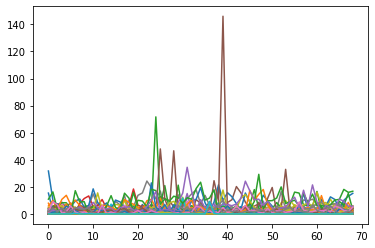

In [6]:
import matplotlib.pyplot as plt
for j in range(len(data_list)) :
  one_sample = data_list[j]
  y = one_sample[:,1]
  x = []

  for i in range(len(one_sample[:,1])):
    x.append(i)
  plt.plot(x,y)

plt.show()

# **ARIMA model**

In [7]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
from math import sqrt


final_test = []
final_predict = []
# split into train and test sets
for j in range(len(data_list)):
  X = data_list[j]
  size = int(len(X) * 0.66)
  train, test = X[0:size], X[size:len(X)]
  train =(train[:,1])
  test = list(test[:,1]+0.00001*np.random.rand(len(test)))
  history =list(train+0.00001*np.random.rand(len(train)))
  predictions = list()
  # model fit
  for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(trend='nc', disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
  final_test.extend(test)
  final_predict.extend(predictions)
# evaluate forecasts
rmse = sqrt(mean_squared_error(final_test, final_predict))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


predicted=-0.013972, expected=-0.013970
predicted=-0.013972, expected=-0.013970
predicted=-0.013973, expected=-0.013971
predicted=-0.013970, expected=-0.013974
predicted=-0.013971, expected=-0.013974
predicted=-0.013973, expected=-0.013969
predicted=-0.013972, expected=-0.013968
predicted=-0.013971, expected=-0.013973
predicted=-0.013971, expected=-0.013970
predicted=-0.013971, expected=-0.013974
predicted=-0.013972, expected=-0.013968
predicted=-0.013970, expected=-0.013975
predicted=-0.013971, expected=-0.013973
predicted=-0.013972, expected=-0.013971
predicted=-0.013972, expected=-0.013974
predicted=-0.013973, expected=-0.013975
predicted=-0.013972, expected=-0.013974
predicted=-0.013974, expected=-0.013968
predicted=-0.013973, expected=-0.013974
predicted=-0.013973, expected=-0.013973
predicted=-0.013972, expected=-0.013975
predicted=-0.013973, expected=-0.013969
predicted=-0.013972, expected=-0.013974
predicted=-0.013972, expected=-0.013967
predicted=0.300790, expected=0.737580
pr

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8.589053, expected=0.490026
predicted=1.393745, expected=0.057702
predicted=0.578145, expected=0.011457
predicted=1.551760, expected=-0.013744
predicted=1.491088, expected=-0.013976
predicted=0.427343, expected=-0.012627
predicted=0.034334, expected=-0.013970
predicted=-0.005910, expected=-0.012601
predicted=-0.010400, expected=-0.013974
predicted=-0.014382, expected=-0.013970
predicted=-0.013502, expected=-0.013968
predicted=-0.013911, expected=-0.013974
predicted=-0.013824, expected=-0.013971
predicted=-0.013860, expected=-0.013974
predicted=-0.013974, expected=-0.013972
predicted=-0.013970, expected=-0.013976
predicted=-0.013976, expected=0.067569
predicted=0.058488, expected=-0.013953
predicted=0.001352, expected=0.022310
predicted=0.004496, expected=0.013644
predicted=0.013311, expected=0.014703
predicted=0.020443, expected=-0.006289
predicted=-0.000591, expected=0.016993
predicted=0.008264, expected=0.028835
predicted=0.018454, expected=0.012318
predicted=0.024553, expe

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.514374, expected=1.706297
predicted=3.260465, expected=0.062801
predicted=0.992325, expected=0.552403
predicted=1.005178, expected=0.884775
predicted=1.780939, expected=-0.013976
predicted=0.508629, expected=3.863363
predicted=1.246346, expected=-0.013385
predicted=1.438708, expected=-0.013974
predicted=1.526166, expected=-0.013971
predicted=-0.037346, expected=0.004183
predicted=1.015016, expected=0.325476
predicted=0.344450, expected=-0.013970
predicted=0.086658, expected=-0.013974
predicted=0.064252, expected=-0.013976
predicted=-0.009979, expected=-0.013972
predicted=-0.013970, expected=-0.013974
predicted=-0.013969, expected=-0.013976
predicted=-0.013970, expected=-0.013975
predicted=-0.013972, expected=-0.013969
predicted=-0.013971, expected=-0.013968
predicted=-0.013972, expected=-0.013977
predicted=-0.013974, expected=-0.013974
predicted=-0.013973, expected=-0.013970
predicted=-0.013972, expected=-0.013974
predicted=-0.013972, expected=-0.013967
predicted=-0.013972,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3.896635, expected=1.292321
predicted=1.860343, expected=-0.012377
predicted=1.812010, expected=-0.013597
predicted=-0.694722, expected=-0.013973
predicted=1.598983, expected=1.659878
predicted=1.321393, expected=4.492814
predicted=3.538832, expected=4.266736
predicted=3.546547, expected=2.737821
predicted=1.714600, expected=3.989071
predicted=2.208322, expected=1.169525
predicted=1.479577, expected=1.680684
predicted=2.223120, expected=2.924019
predicted=3.061003, expected=2.515273
predicted=2.984621, expected=3.800970
predicted=-0.013974, expected=-0.013972
predicted=-0.013972, expected=-0.013974
predicted=-0.013974, expected=-0.013967
predicted=-0.013972, expected=-0.013976
predicted=-0.013973, expected=-0.013970
predicted=-0.013972, expected=-0.013975
predicted=-0.013972, expected=-0.013967
predicted=-0.013973, expected=-0.013973
predicted=-0.013971, expected=-0.013974
predicted=-0.013972, expected=-0.013971
predicted=-0.013971, expected=-0.013969
predicted=-0.013973, exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


LinAlgError: ignored

In [ ]:
X = []
y = []
mem_step = 14

for item in data_list:
  for i in range(mem_step, 69):
      X.append(item[i-mem_step:i, 1:2])
      # print(item[i-mem_step:i, 1:2])
      y.append(item[i, 1:2])

X, y = np.array(X), np.array(y)
X, y = X.astype('float32'), y.astype('float32')

# **LSTM Model**

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# check GPU availability
print("GPU is available :)" if tf.config.list_physical_devices("GPU") else "Not available :(")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
keras_reg = Sequential()

keras_reg.add(LSTM(units = 64, return_sequences = True, input_shape = (X.shape[1], 1)))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 16))
keras_reg.add(Dropout(0.2))

# keras_reg.add(Dense(units=32, activation='relu' ))
keras_reg.add(Dense(units=16, activation='relu' ))
keras_reg.add(Dense(units = 1))
keras_reg.compile(optimizer = 'adam',
                  loss = 'mean_squared_error',
                  metrics='mse')
# keras_reg.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
history = keras_reg.fit(X_train, y_train,validation_split=0.2,shuffle=False,epochs = 30,verbose = 1)

In [ ]:
def plot_loss(history):
  fig = plt.figure(figsize=(7,7))
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

predicted_stock_price = keras_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_stock_price)/len(y_test)